An Object Oriented Approach to Tensorflow: the Linear Regression Model
=========================================

There are plenty of Tensorflow tutorials. However it is less common for scriptor's to structure their code into objects. My experience is primarily with data science research, so writing objects is not usually required. However, when moving towards the engineering of ML products, objects are required.

* * * 

We shall witness a Tensorflow linear regression model attempt to fit a one-dimensional data series. Although the major distinction of the data is a positively increasing trend, we can imagine that the datapoints represent the upward path of a business cycle with a randomly fluctuating component. This tutorial doesn't address the conceptual considerations of the Linear Regression - it merely implements it, via Tensorflow.

In [106]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
class LinReg(object):
    def __init__(self, X, Y, W, b, n_samples, LR):
        self.X         = tf.placeholder("float")
        self.Y         = tf.placeholder("float")
        self.W         = tf.Variable(np.random.randn(), name = "weight")
        self.b         = tf.Variable(np.random.randn(), name = "bias")

        # constants
        self.n_samples = n_samples
        self.LR        = LR
        
    def Model(self):
        predictor = tf.add(tf.mul(self.X, self.W), self.b)
        MSE       = tf.reduce_sum(tf.pow(predictor - self.Y, 2))/(2*self.n_samples)
        optimiser = tf.train.GradientDescentOptimizer(self.LR).minimize(MSE)
        return optimiser

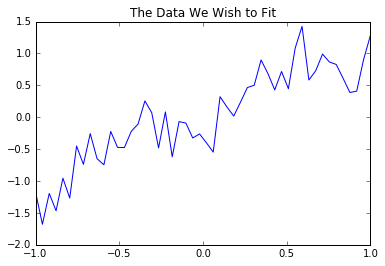

In [131]:
data_pts   = 50
eX         = np.linspace(-1,1,data_pts)
eY         = eX + np.random.randn(*eX.shape) * 0.33    # 10x1 np.array

plt.plot(eX, eY)
plt.title("The Data We Wish to Fit")
plt.show()

eW         = 0.5
eb         = 0.6
LR         = 0.01

In [129]:
# intialising the Model
eeY = np.random.randn(*eX.shape)
Trend = LinReg(eX, eeY, eW, eb, data_pts, LR)
optim = Trend.Model()

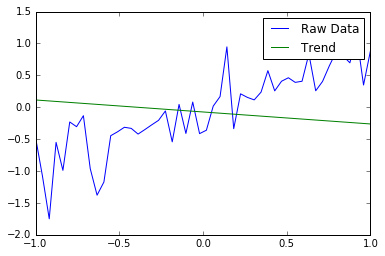

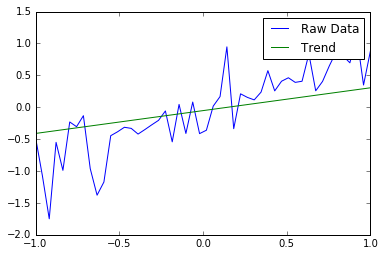

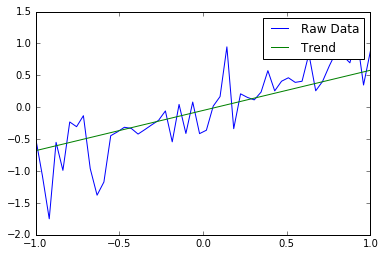

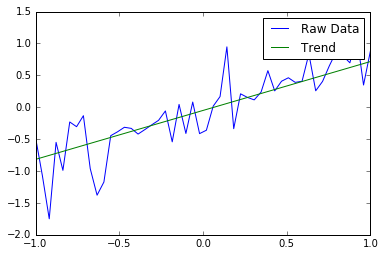

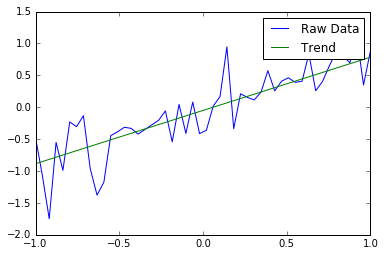

In [124]:
epochs = 1000
step   = 200

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    
    optim = Trend.Model()
    for epoch in range(epochs):
        for (x,y) in zip(eX, eY):
            sess.run(optim, feed_dict={Trend.X:x, Trend.Y:y})
        
        if (epoch+1) % step == 0:
            plt.plot(eX, eY, label='Raw Data')
            plt.plot(eX, sess.run(Trend.W) * eX + sess.run(Trend.b), label='Trend')
            plt.legend()
            plt.show()